In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

# Read data

Some of these packages have their own graph reading capabiliites, but for this notebook we'll use pandas to read in the graph. 

Take a look at what the file looks like:

In [3]:
! head ./example_graphs/anoxia_pearson_0.98.wel

0468	00001048
Q0032	YKL224C	0.9804
Q0110	YAR020C	0.9822
Q0110	YGL260W	0.9876
Q0110	YHL009W	0.982
Q0110	YIL174W	0.9865
Q0110	YIL175W	0.9825
Q0110	YIR040C	0.9801
Q0110	YJL114W	0.9855
Q0110	YLL025W	0.982


In [4]:
df = pd.read_csv('./example_graphs/anoxia_pearson_0.98.wel', sep='\t', skiprows=1, names=['source', 'target', 'weight'], index_col=False)
print(df.shape)

(1048, 3)


In [5]:
df.head()

,source,target,weight
0,Q0032,YKL224C,0.9804
1,Q0110,YAR020C,0.9822
2,Q0110,YGL260W,0.9876
3,Q0110,YHL009W,0.9820
4,Q0110,YIL174W,0.9865


# Networkx

In [6]:
import networkx as nx

In [7]:
g = nx.from_pandas_edgelist(df, 'source', 'target', 'weight')

In [8]:
print('Number vertices is %i'%g.number_of_nodes())
print('Number edges is %i'%g.number_of_edges())

Number vertices is 468
Number edges is 1048


In [9]:
graph_layout = nx.layout.fruchterman_reingold_layout(g, scale=5.0)

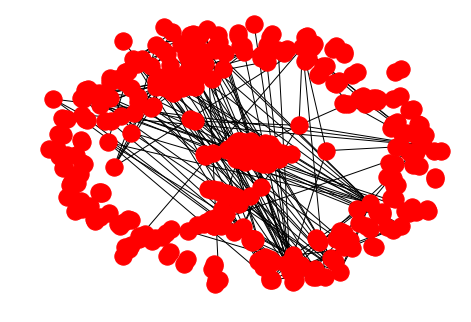

In [10]:
nx.draw(g, arrows=False, pos=graph_layout, edge_color='black')

# igraph

In [11]:
import igraph as ig

In [12]:
g = ig.Graph.TupleList(df.values, weights=True)

In [13]:
print('Number vertices is %i'%g.vcount())
print('Number edges is %i'%g.ecount())

Number vertices is 468
Number edges is 1048


In [14]:
graph_layout=g.layout('kk')

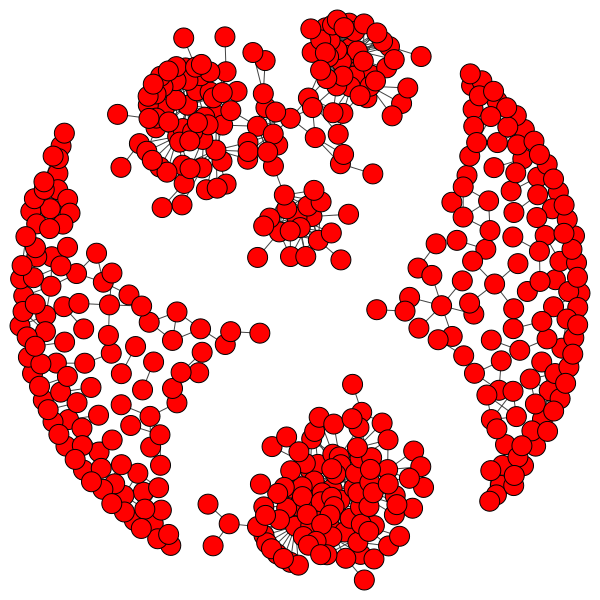

In [15]:
ig.plot(g, layout=graph_layout)

# Plotly and igraph

Plotly does not have a dedicated graph interface, but can be used to make good looking and interactive figures in html. 

You will need igraph or networkx to create the layout (vertex positions). See https://plot.ly/python/igraph-networkx-comparison/ for examples of both. This example uses the igraph from above.  

The figure is a scatter plot for the vertices and a line plot for the edges. 

In [16]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [17]:
vertices_labels = [v['name'] for v in g.vs]
edges_labels = [e['weight'] for e in g.es]

In [18]:
# Vertices coordinates
Xn = np.empty(g.vcount()) # x-coordinates
Yn = np.empty(g.vcount()) # y-coordinates

for k in xrange(g.vcount()):
    Xn[k] = graph_layout[k][0]
    Yn[k] = graph_layout[k][1]
    
# Vertex trace object
vertices_trace = Scatter(x=Xn, y=Yn,
                         mode='markers',
                         marker=Marker(symbol='dot',
                                       size=20,
                                       line=Line(color='rgb(50,50,50)', width=0.5)
                                       ),
                         text=vertices_labels,
                         hoverinfo='text'
                         )

In [19]:
# Edges coordinates
Xe = np.empty(3*g.ecount())
Ye = np.empty(3*g.ecount())

i = 0
for e in g.es:
    e = e.tuple
    Xe[i:i+3] = [graph_layout[e[0]][0],graph_layout[e[1]][0], None]
    Ye[i:i+3] = [graph_layout[e[0]][1],graph_layout[e[1]][1], None]
    i += 3

# Edges trace object
edges_trace = Scatter(x=Xe, y=Ye,
                      mode='lines',
                      line=Line(color='rgb(125,125,125)', width=2),
                      text=edges_labels,
                      hoverinfo='text' 
                      )

In [20]:
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

layout=Layout(
                font= Font(size=12),
                showlegend=False,
                autosize=False,
                width=800,
                height=800,
                xaxis=XAxis(axis),
                yaxis=YAxis(axis),          
                margin=Margin(
                    l=40,
                    r=40,
                    b=85,
                    t=100,
                ),
                hovermode='closest',           
                )


In [21]:
data=Data([edges_trace, vertices_trace])
fig=Figure(data=data, layout=layout)

In [22]:
iplot(fig)

# visJS2jupyter

In [23]:
import visJS2jupyter.visJS_module

In [25]:
scale = 50

nodes_dict = [{"id":n['name'],
          "x":graph_layout[n.index][0]*scale,
          "y":graph_layout[n.index][1]*scale,  
          "degree":g.degree(n)} for n in g.vs()
          ]

edges_dict = [{"source":n.source, 
           "target":n.target,
           "type":['weight']} for n in g.es()]


In [26]:
# plot network
visJS2jupyter.visJS_module.visjs_network(nodes_dict,
                                         edges_dict, 
                                         node_size_multiplier=2,
                                         node_size_field='degree',
                                         edge_label_field='type',
                                         edge_width=2, 
                                         edge_color_highlight='#8A324E',
                                         edge_color_hover='red',
                                         graph_id=0, 
                                         )